# **Lecture 6: B2B Pricing**
Olivier Rubel, PhD

Associate Professor of Marketing and Business Analytics

UC Davis

Analytical Decision Making -- MSBA Program


Date: May 5th, 2021



00. From last week 
0. B2B Pricing: an Introduction  
1. Load Data
2.   Rename Variables
3.   Plot Win/Lost per Category
4.   Logistic Regression
5.   Optimization Approach 1
6.   Optimization Approach 2
7.   Optimization Approach 3
8.   Optimization Approach 4
9.   Revenue Implications
10. We can do better, how?

Some links:

https://hbr.org/2018/06/a-survey-of-1700-companies-reveals-common-b2b-pricing-mistakes

https://www.mckinsey.com/business-functions/marketing-and-sales/our-insights/what-really-matters-in-b2b-dynamic-pricing





# **From Last Week**

## Response Curve form the Normal Distribution
Let's assume that the pdf of the willingness to pay is Normally distributed, i.e., with mean and variance $\mu$ and $\sigma^2$, respectively. 

\begin{equation}
w(p)\sim N\left(\mu,\sigma^2\right)
\end{equation}

Market research revealed that the market potential is $M$. Customers who will buy the product are those whose willingness to pay for the product is greater than the posted price, $p$, such that.

\begin{equation}
d(p)=M \times \left[1-\Phi\left( \frac{p-\mu}{\sigma}  \right)\right]
\end{equation}

The optimization problem is then to choose the price $p^*$ that will maximize profit.
\begin{equation}
\text{Maximize}_p\quad d(p)\times (p-c)=M\times \left[1-\Phi\left( \frac{p-\mu}{\sigma}  \right)\right] \times (p-c)
\end{equation}
where $c$ is the variable cost.

Recall that the CDF of the Normal distribution is 
\begin{equation}
\frac{1}{2} \times \left[1+erf\left( \frac{p-\mu}{\sigma \sqrt{2}}   \right)   \right]
\end{equation}

In [1]:
import matplotlib.pyplot as plt#
import numpy as np
import math
import scipy
import scipy.stats as stats
import math
mu = 15
variance = 16
sigma = math.sqrt(variance)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

ImportError: 
Importing the multiarray numpy extension module failed.  Most
likely you are trying to import a failed build of numpy.
If you're working with a numpy git repo, try `git clean -xdf` (removes all
files not under version control).  Otherwise reinstall numpy.


In [2]:
## Homogeneous Segment
import math
import numpy as np
from math import *
from scipy.optimize import minimize_scalar
c=10 # Marginal cost
mu=15 # mu
sigma=16 # Sigma
M=100000 # Market size
def profit(p):
    """This is the negative profit function"""
    return -M*(1-0.5*(1+erf((p-mu)/(sigma*math.sqrt(2)))))*(p-c)#Note the minus sign because of routine is coded as a minimization
res = minimize_scalar(profit) # The routine is coded as mininization
print(-round(res.fun)) # Return the profit level at the optimal price. Note that here I am rounding the results
print(round(res.x)) # This is the optimal price

401833
24


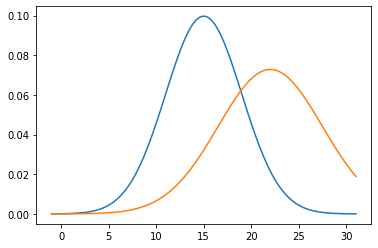

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math
mu1, mu2 = 15, 22
variance1,variance2 = 16, 30
sigma1 = math.sqrt(variance1)
sigma2 = math.sqrt(variance2)
x = np.linspace(mu1 - 4*sigma1, mu1 + 4*sigma1, 100)
plt.plot(x,stats.norm.pdf(x, mu1, sigma1))
plt.plot(x,stats.norm.pdf(x, mu2, sigma2))
plt.show()

In [4]:
## Two Segments; two different prices
## there are two segments of proportion alpha and 1-alpha, with wtp that are normally distributed with vector mu and sigma
import math
import numpy as np
from math import *
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize
mu=np.array([15,22])
sigma=np.array([16,30])
alpha=.5#
c=0
M=1
def profit2(p):
    """Profit """
    return -alpha*((1-0.5*(1+erf((p[0]-mu[0])/(sigma[0]*math.sqrt(2)))))*\
                       (p[0]-c))-\
                       (1-alpha)*((1-0.5*(1+erf((p[1]-mu[1])/(sigma[1]*math.sqrt(2)))))*\
                       (p[1]-c))
sol2=minimize(profit2, [0.1, 0.1], method="BFGS")
print(-sol2.fun)
print(sol2.x)

9.756085715455209
[17.65310055 30.44643962]


# **B2B Pricing**

B2B Data from a firm selling a marketing automation software. 

Two main channels are used to sell, i.e., (1) directly after lead generation efforts (e.g., trade-shows, email marketing campaign, website of the company) and (2) indirectly through "partners".

The company has two types of "products", i.e., (1) cloud products and (2) "on-premise" products

The data set has information about:


1.   Dates at which each lead was generated and closed
2.   Whether it's a "new logo" or not
3.   Type of product sought
4.   Deal was won or lost
5.   Billing plan (e.g., one year vs. three years)
6.   Annual Contract Value (ACV)
7.   Amount
8.   Discount
9.   Net Amount (i.e., amoumt - discount)





# Questions from the sales operations manager:



*   Hypothesis: partner type opportunities have higher ACV, i.e., they sign more multi-year contracts compared to direct type leads. Is that true?
*   Does partner opportunities (lead source) have different characteritics (higher ACV, higher close rates) than other opportunities?
* Assume calendar quarters (e.g., Q1-Jan-March, etc), do we see differnt behaviors across quarters?
* Is there a relationship between end of the quarter and key metrics, like discounts?

In [5]:
import matplotlib.pyplot as plt#
import numpy as np
import math
import scipy
import scipy.stats as stats
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize
from sklearn import preprocessing
import seaborn as sns
#sns.set(style="white")
#sns.set(style="whitegrid", color_codes=True)
import pandas as pd # Load Pandas which is a Python package to manipulate data; call it 'pd'
import numpy as np # Load Numpy which is a Python package to manipulate to do math, call it 'np'
url = 'data.csv' #This is the link to my github profile with the data
df = pd.read_csv(url)#this load the data from the URL define above
df.head() #just looking at the data
#df['Stage'].unique()

,ID,Close Date,Created Date,New Logo,Type,Stage,Billing Plan,ACV,Discount Amount,Amount,Net Amount
0,1,5/26/17,5/4/17,1,Direct - Cloud Product,Closed Lost,3 Years,431370,,225000,225000
1,2,12/29/16,11/29/16,1,Partner - OnPremise Product,Closed Won - Paid,3 Years,22050,80850,147000,66150
2,3,12/29/16,12/9/16,1,Partner - Cloud Product,Closed Won - Paid,3 Years,32750,43200,96000,52800
3,4,9/9/16,4/20/16,1,Direct - Cloud Product,Closed Won - Paid,4 Years,36694,44800,128000,83200
4,5,9/22/16,9/1/16,1,Partner - OnPremise Product,Closed Won - Paid,3 Years,18700,9900,66000,56100


Lost    971
Won     534
Name: Stage, dtype: int64

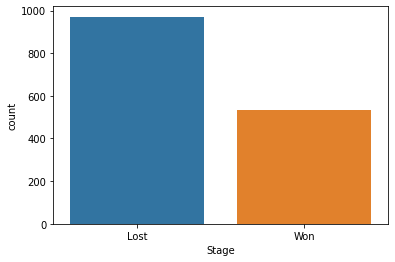

In [6]:
# merge data on no condition
df['Stage']=np.where(df['Stage'] =='Closed Lost', 'Lost', df['Stage'])
df['Stage']=np.where(df['Stage'] =='Closed Won - Paid', 'Won', df['Stage'])
df['Stage']=np.where(df['Stage'] =='Closed Won - Not Paid', 'Won', df['Stage'])
df['Stage']=np.where(df['Stage'] =='Closed - Lost', 'Lost', df['Stage'])
df['Stage']=np.where(df['Stage'] =='Closed Lost - Not Renewing', 'Lost', df['Stage'])
sns.countplot(x='Stage',data=df)
# merge 之后stage只有两种取值，lost和won
df['Stage'].value_counts()

In [7]:
#compute the aggregate conversion rate
# 整体转化率，won占整体的比例
count_Lost = len(df[df['Stage']=='Lost'])
count_Won = len(df[df['Stage']=='Won'])
round(count_Won/(count_Lost+count_Won),3)

0.355

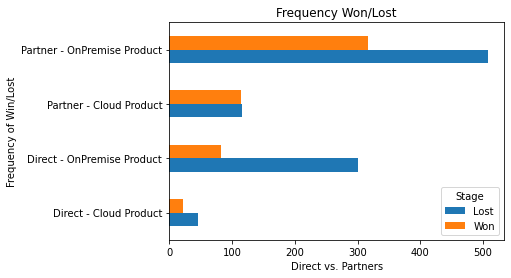

In [9]:
#display win/lost data for different channel/product configurations
%matplotlib inline
pd.crosstab(df.Type,df.Stage).plot(kind='barh')
plt.title('Frequency Won/Lost')
plt.xlabel('Direct vs. Partners')
plt.ylabel('Frequency of Win/Lost')
plt.savefig('WinLost')

In [10]:
#provide the values for the variable "Type"
# 查看Type有几种取值
df['Type'].unique()

array(['Direct - Cloud Product', 'Partner - OnPremise Product',
       'Partner - Cloud Product', 'Direct - OnPremise Product'],
      dtype=object)

In [2]:
#create binary variables
# 把原来的type一列展开 变成四列，用1或者0表示
df['Partner cloud']=np.where(df['Type'] =='Partner - Cloud Product', 1.0,0.0)
df['Partner prem']=np.where(df['Type'] =='Partner - OnPremise Product', 1.0, 0.0)
df['Direct cloud']=np.where(df['Type'] =='Direct - Cloud Product', 1.0,0.0)
df['Direct prem']=np.where(df['Type'] =='Direct - OnPremise Product', 1.0, 0.0)
#making sure entries are numeric.
df['amount']=pd.to_numeric(df[' Amount '],errors='coerce')
df['net amount']=pd.to_numeric(df[' Net Amount '],errors='coerce')
df['discount']=df['amount']-df['net amount']
df['depth']=df['discount']/df['amount']
df.drop(' Discount Amount ',axis=1)
# 删掉这些列
df.drop([' Discount Amount ',' ACV ',' Discount Amount ',' Amount ', ' Net Amount ', 'ID', 'Type'],axis=1).head()

NameError: name 'np' is not defined

In [12]:
# 求每列的平均值，保留两位小数
round(df.groupby('Type').mean().drop(['ID','Partner cloud', 'Partner prem', 'Direct cloud', 'Direct prem'],axis=1),2)

,New Logo,amount,net amount,discount,depth
Type,,,,,
Direct - Cloud Product,0.72,109213.25,87843.81,21369.45,0.16
Direct - OnPremise Product,0.35,52366.70,44466.40,7900.30,0.06
Partner - Cloud Product,0.77,152230.87,120068.63,32162.24,0.18
Partner - OnPremise Product,0.41,75928.42,63234.93,12679.17,0.10


In [13]:
import statsmodels.api as sm
df['y']=np.where(df['Stage'] =='Won', 1.0,0.0)
y=df['y'] # 因变量
df['const']=1 # 常量列
x1=df[['const','amount','discount']] # 自变量
# ordinary least square 普通最小二乘法回归模型
model1 = sm.OLS(y, x1, missing='drop')
model1.fit
type(model1)
result1=model1.fit()
# 输出模型摘要，coef就是回归系数
print(result1.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     65.61
Date:                Thu, 06 May 2021   Prob (F-statistic):           5.26e-28
Time:                        20:40:12   Log-Likelihood:                -938.56
No. Observations:                1455   AIC:                             1883.
Df Residuals:                    1452   BIC:                             1899.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3461      0.015     23.247      0.0

# **Mathematical Formulation**

\begin{equation}
p(Y=1|x)=\frac{e^{x'\beta}}{1+e^{x'\beta}}
\end{equation}

In our case 
\begin{equation}
x'\beta=\beta_0+\beta_1\times \text{Amount}+\beta_2 \times \text{Discount}
\end{equation}


source: https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.Logit.cdf.html#statsmodels.discrete.discrete_model.Logit.cdf

In [14]:
import statsmodels.api as sm
df['y']=np.where(df['Stage'] =='Won', 1.0,0.0)
y=df['y'] # 因变量
df['const']=1 # 常量列
x1=df[['const','amount','discount']] # 自变量
# 逻辑回归
model1 = sm.Logit(y, x1, missing='drop')
model1.fit
type(model1)
result1=model1.fit()
print(result1.summary())
# 输出回归系数
print(result1.params)

Optimization terminated successfully.
         Current function value: 0.545345
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1455
Model:                          Logit   Df Residuals:                     1452
Method:                           MLE   Df Model:                            2
Date:                Thu, 06 May 2021   Pseudo R-squ.:                  0.1694
Time:                        20:40:16   Log-Likelihood:                -793.48
converged:                       True   LL-Null:                       -955.34
Covariance Type:            nonrobust   LLR p-value:                 5.048e-71
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0442      0.090    -11.596      0.000      -1.221      -0.868
amount     -2.239e-06    1.1e

# **Price Optimization**


Using these results, I want to optimize on the price

\begin{equation}
R(p)=Proba(Y=1|p,d) \times (p-d)
\end{equation}

In [2]:
#Price Optimization
from scipy.optimize import minimize
# 三个回归系数
b0=result1.params[0]
b1=result1.params[1]
b2=result1.params[2]
def revenue(p):
    """This is the negative revenue function"""
    return -np.exp(b0+b1*p[0]+b2*p[1])/(1+np.exp(b0+b1*p[0]+b2*p[1])*(p[0]-p[1]))
init=[np.mean(df['amount']),np.mean(df['net amount'])]#initial condition
# 用BFGS方法求revenue函数的最小值
sol1=minimize(revenue, init, method="BFGS",tol=0.001)
print(sol1.success)
print(sol1.x[0],sol1.x[1])
print(np.mean(df['amount']),np.mean(df['discount']))

ImportError: 
Importing the multiarray numpy extension module failed.  Most
likely you are trying to import a failed build of numpy.
If you're working with a numpy git repo, try `git clean -xdf` (removes all
files not under version control).  Otherwise reinstall numpy.


In [16]:
## Price Optimization
from scipy.optimize import minimize_scalar
b0=result1.params[0]
b1=result1.params[1]
b2=result1.params[2]
#p=np.mean(df['amount'])

d=np.mean(df['discount'])
#I first optimize on the "list price"
def revenueP(p):
    """This is the negative revenue function"""
    return -np.exp(b0+b1*p+b2*d)/(1+np.exp(b0+b1*p+b2*d))*(p-d)
sol1=minimize_scalar(revenueP)
print(round(sol1.x,1))

#then I optimize on the discount given the result of the first optimization#
p=sol1.x
def revenueD(d):
    """This is the negative revenue function"""
    return -np.exp(b0+b1*p+b2*d)/(1+np.exp(b0+b1*p+b2*d))*(p-d)
sol2=minimize_scalar(revenueD)

print(round(sol2.x,1))
#Below: Firt number is the "optimal" depth, i.e., discount/total amount. 
#       Second number is the "empirical" depth
print(round(sol2.x/sol1.x,2),round(np.mean(df['discount'])/np.mean(df['amount']),2))

578072.2
86986.3
0.15 0.18


# **Enriching the Intercept**

In [17]:
y=df['y']
x2=df[['discount','amount','New Logo','Partner cloud','Partner prem','Direct cloud','Direct prem']]
model2 = sm.Logit(y, x2, missing='drop')
model2.fit
type(model2)
result2=model2.fit()
print(result2.summary())

Optimization terminated successfully.
         Current function value: 0.456468
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1455
Model:                          Logit   Df Residuals:                     1448
Method:                           MLE   Df Model:                            6
Date:                Thu, 06 May 2021   Pseudo R-squ.:                  0.3048
Time:                        20:40:25   Log-Likelihood:                -664.16
converged:                       True   LL-Null:                       -955.34
Covariance Type:            nonrobust   LLR p-value:                1.487e-122
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
discount       4.558e-05   5.31e-06      8.578      0.000    3.52e-05     5.6e-05
amount        -2.466

In [ ]:
#Probability predicted by estimation: matrix multiplication on the x matrix with the vector of parameter estimates
round(np.mean(np.exp(np.matmul(x2,result2.params))/(1+np.exp(np.matmul(x2,result2.params)))),2)

0.37

# Which discount for leads?

In [18]:
#For customer ID=i, I compute the utility using x2 and the parameter estimates, I then optimize on the discount 
ID=10
UT=np.matmul(x2.iloc[ID,1:7],result2.params[1:7])
b=result2.params[0]
p=x2.iloc[ID,1]
def revenueD(d):
    """This is the negative revenue function"""
    return -np.exp(UT+b*d)/(1+np.exp(UT+b*d))*(p-d)
sol3=minimize_scalar(revenueD)
#First argument is the optimal discount
#Second argument is the actual discount
print(round(sol3.x,0),round(x2.iloc[ID,0],0))

30033.0 61740.0


In [19]:
#Loop to optimize discounts for each individual leads
ID=0
ID_max=1505
z=np.empty([ID_max,])
while ID<=ID_max-1:
  UT=np.matmul(x2.iloc[ID,1:7],result2.params[1:7])
  b=result2.params[0]
  p=x2.iloc[ID,1]
  def revenueD(d):
    """This is the negative revenue function"""
    return -np.exp(UT+b*d)/(1+np.exp(UT+b*d))*(p-d)
  sol3=minimize_scalar(revenueD)
  z[ID]=sol3.x
  ID=ID+1
print(round(np.mean(z),0),np.round(np.mean(df['discount']),0))
np.min(z)#the minimum discount is negative, so you we need to change the code a bit to take care of this issue

18214.0 14927.0


-22564.058088460235

In [20]:
#Attempt to personalized pricing
#### with sqrt(x^2) for discount
ID=0
ID_max=1505
z=np.empty([ID_max,])
while ID<=ID_max-1:
  UT=np.matmul(x2.iloc[ID,1:7],result2.params[1:7])
  b=result2.params[0]
  p=x2.iloc[ID,1]
  def revenueD(d):
    """This is the negative revenue function"""
    return -np.exp(UT+b*np.sqrt(d**2))/(1+np.exp(UT+b*np.sqrt(d**2)))*(p-np.sqrt(d**2))
  sol3=minimize_scalar(revenueD)
  z[ID]=sol3.x
  ID=ID+1
print(round(np.mean(z),0),np.round(np.mean(df['discount']),0))
#np.min(z)

20246.0 14927.0


In [21]:
print(np.mean(np.sqrt(z**2)/df['amount']),np.mean(df['discount']/df['amount']))
df['optimal discount']=np.sqrt(z**2)
round(df.groupby('Type').mean(),2)

0.19465198474015072 0.10541836604422394


,ID,New Logo,Partner cloud,Partner prem,Direct cloud,Direct prem,amount,net amount,discount,depth,y,const,optimal discount
Type,,,,,,,,,,,,,
Direct - Cloud Product,760.78,0.72,0.0,0.0,1.0,0.0,109213.25,87843.81,21369.45,0.16,0.32,1.0,37177.57
Direct - OnPremise Product,840.21,0.35,0.0,0.0,0.0,1.0,52366.70,44466.40,7900.30,0.06,0.21,1.0,14193.99
Partner - Cloud Product,627.31,0.77,1.0,0.0,0.0,0.0,152230.87,120068.63,32162.24,0.18,0.50,1.0,39843.60
Partner - OnPremise Product,746.90,0.41,0.0,1.0,0.0,0.0,75928.42,63234.93,12679.17,0.10,0.38,1.0,16191.89


In [22]:
print(np.mean(z/df['amount']),np.mean(df['discount']/df['amount']))
df['optimal discount']=z
round(df.groupby('Type').mean(),2)


0.19465198474015072 0.10541836604422394


,ID,New Logo,Partner cloud,Partner prem,Direct cloud,Direct prem,amount,net amount,discount,depth,y,const,optimal discount
Type,,,,,,,,,,,,,
Direct - Cloud Product,760.78,0.72,0.0,0.0,1.0,0.0,109213.25,87843.81,21369.45,0.16,0.32,1.0,37177.57
Direct - OnPremise Product,840.21,0.35,0.0,0.0,0.0,1.0,52366.70,44466.40,7900.30,0.06,0.21,1.0,14193.99
Partner - Cloud Product,627.31,0.77,1.0,0.0,0.0,0.0,152230.87,120068.63,32162.24,0.18,0.50,1.0,39843.60
Partner - OnPremise Product,746.90,0.41,0.0,1.0,0.0,0.0,75928.42,63234.93,12679.17,0.10,0.38,1.0,16191.89


# **Computation Revenue Improvement**
[in expectation]

In [23]:
#xS for x star
#Here I compute the revenue improvement for each lead, one by one
xS=df[['optimal discount','amount','New Logo','Partner cloud','Partner prem','Direct cloud','Direct prem']]
ID=0
ID_max=1505
revOpt=np.empty([ID_max,])
while ID<=ID_max-1:
  j=0
  u=0
  while j<=6:
    u=u+xS.iloc[ID][j]*result2.params[j]
    j=j+1
  proba=np.exp(u)/(1+np.exp(u))
  revOpt[ID]=proba*(xS['amount'][ID]-z[ID])
  ID=ID+1
revOpt=np.nan_to_num(revOpt);

In [24]:
#Here I compute the overall revenue improvement as a ratio.
df['Revenue']=np.where(df['Stage'] =='Won',df['net amount'] ,0.0)
round(np.sum(revOpt)/np.sum(df['Revenue']),2)#This is the ratio of the optimized expected revenue / actual revenues

1.5

In [25]:
# Here I display actual vs optimized
df['Optimized Revenue']=revOpt#This adds a column in the dataframe with the optimized revenue
dff=df[['Type','Stage','discount','optimal discount','Revenue','Optimized Revenue']]
round(dff.groupby('Type').mean(),2)


,discount,optimal discount,Revenue,Optimized Revenue
Type,,,,
Direct - Cloud Product,21369.45,37177.57,22544.19,49626.07
Direct - OnPremise Product,7900.30,14193.99,12667.74,17542.94
Partner - Cloud Product,32162.24,39843.60,50066.54,90912.88
Partner - OnPremise Product,12679.17,16191.89,28546.51,37455.94


# Questions from the sales operations manager:



*   Hypothesis: partner type opportunities have higher ACV, i.e., they sign more multi-year contracts compared to direct type leads. Is that true?
*   Does partner opportunities (lead source) have different characteritics (higher ACV, higher close rates) than other opportunities?
* Assume calendar quarters (e.g., Q1-Jan-March, etc), do we see differnt behaviors across quarters?
* Is there a relationship between end of the quarter and key metrics, like discounts?







# Scrap book

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8